In [180]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from config import api_key,mysql_key

from sqlalchemy import create_engine

Often good enough. Don't over-engineer your solution. If your data is linear then use a linear model.

In [181]:
rds_connection_string = "root:" + mysql_key + "@127.0.0.1/project2_Happiness"
engine = create_engine(f'mysql://{rds_connection_string}')
engine.table_names()
conn = engine.connect()

In [182]:


#Country,Happiness_Rank,Happiness_Score,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Generosity,Trust__Government_Corruption_,Dystopia_Residual

hp_df = pd.read_sql("SELECT * FROM Happiness_data where year = '" +  str(my_year) + "'", conn)
#hp_df=hp_df.set_index("Freedom").sort_values("Freedom")
hp_df

,Country,Happiness_Rank,Happiness_Score,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Generosity,Trust__Government_Corruption_,Dystopia_Residual,year,row_id
0,Afghanistan,153.0,3.574559,0.319821,0.302853,0.303354,0.234138,0.365104,0.097188,1.952101,2014,153
1,Albania,95.0,4.959383,0.878675,0.804339,0.813254,0.357326,0.142725,0.064127,1.898939,2014,95
2,Algeria,68.0,5.604596,0.939290,1.077719,0.617659,0.285786,0.078223,0.173832,2.432085,2014,68
3,Angola,137.0,4.032897,0.757785,0.860398,0.166827,0.103843,0.123438,0.071216,1.949391,2014,137
4,Argentina,30.0,6.574047,1.053505,1.248233,0.787230,0.449736,0.114508,0.084837,2.835997,2014,30
5,Armenia,127.0,4.349980,0.768212,0.777113,0.729897,0.198474,0.078553,0.039005,1.758726,2014,127
6,Australia,10.0,7.284054,1.333584,1.309229,0.931556,0.651244,0.435616,0.356365,2.266460,2014,10
7,Austria,13.0,7.199880,1.337232,1.297041,0.890422,0.624335,0.330885,0.186762,2.533203,2014,13
8,Azerbaijan,80.0,5.211945,1.023888,0.937932,0.640453,0.370296,0.077993,0.160654,2.000728,2014,80
9,Bahrain,49.0,5.959669,1.323762,1.216244,0.747157,0.454918,0.173621,0.305997,1.737969,2014,49


In [183]:

my_year="2014"
my_params_arr=["Economy__GDP_per_Capita_","Family,Health__Life_Expectancy_","Freedom,Generosity","Trust__Government_Corruption_","Dystopia_Residual"]



In [184]:
good_columns=["Country","Happiness_Rank","Happiness_Score","Economy__GDP_per_Capita_","Family","Health__Life_Expectancy_","Freedom","Generosity","Trust__Government_Corruption_","Dystopia_Residual"]
 
    
datA=pd.DataFrame(data=hp_df,columns=good_columns)
#datA=datA.reset_index()
X=datA["Happiness_Score"]

X.head()



0    3.574559
1    4.959383
2    5.604596
3    4.032897
4    6.574047
Name: Happiness_Score, dtype: float64

In [185]:
X=np.array(X.values.view(type=np.matrix))
X=X.reshape(-1, 1)

In [186]:
#X = X.reshape(X.shape[:1])
#X.transpose()
X.shape

(158, 1)

In [164]:
y=datA["Freedom"].values


y.shape

(158,)

In [165]:
#from sklearn.datasets import make_regression

#X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)
#X

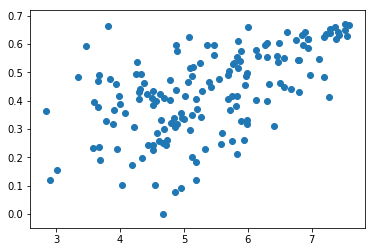

In [166]:
plt.scatter(X, y)

First, we create the model using the Sklearn LinearRegression model.

In [167]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Next, we fit the model to our data using the fit method. 

In [168]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


We can view the coefficients and intercept of the line from the `coef_` and `intercept_` attributes. Note that the `_` suffix indicates that the attribute is available after model is fit to the data (trained).

In [169]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [0.07478469]
y-axis intercept:  0.026591250323834803


We can use our model to make predictions.

In [170]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 0.23413774371147156
Predicted output: 0.2939135346748491
Prediction Error: 0.05977579096337754


In [171]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,0.293914,0.234138,0.059776
1,0.397477,0.357326,0.040152
2,0.445729,0.285786,0.159943
3,0.328190,0.103843,0.224347
4,0.518229,0.449736,0.068493
5,0.351903,0.198474,0.153429
6,0.571327,0.651244,-0.079917
7,0.565032,0.624335,-0.059303
8,0.416365,0.370296,0.046069
9,0.472283,0.454918,0.017365


We can calculate the output response for the minimum and maximum input values. Note: This is useful later when we want to plot the fit line.

In [172]:
x_min = X.min()
x_max = X.max()

In [173]:
y_min_actual = y.min()
y_max_actual = y.max()

In [177]:
y_min = model.intercept_ + model.coef_ * x_min
y_max = model.intercept_ + model.coef_ * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 0.0
Calculated Min Value: [0.23890189]
Actual Max Value: 0.6697317957878113
Calculated Max Value: [0.59397902]


We can also use the predict function to calculate predicted values

In [178]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 0.0
Predicted Min Value: [0.23890189]
Actual Max Value: 0.6697317957878113
Predicted Max Value: [0.59397902]


We can show the model fit by plotting the predicted values against the original data

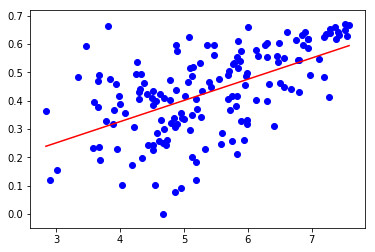

In [179]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')